# <b>Covid 19 Ultrasound project</b>

  **Group - 3** Submission 

---
 Group Members: 

    Ritika Khurana                  -  0766413
    Ramya Guda                      -  0771097
    Vasu Vandan Kodakandla          -  0770472
    Adrian Silva                    -  0756525 
    Siva Chaitanya Sykam            -  0770796 

**Steps followed**

1. Loading the data from various folders of CovidProject-Script 
2. Grayscale and not RGB
3. Resize any images that are not the correct size - normalizing 
4. Store these arrays in the proper shape in an appropriate data structure
5. Create a target array to keep track of the proper class 
6. View a few images after processing to verify that everything is working as it should

In [1]:
#ALL LIBRARIES IN USE
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import cv2
import os
#!pip install tensorflow numpy mnist 

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
import time
from PIL import Image
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Dense
from pathlib import Path
import tensorflow as tf
import numpy as np


from tensorflow.keras.optimizers import Adam
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

#!pip install tensorflow numpy mnist             
from tensorflow.keras.datasets import mnist        #importing mnist data 
from tensorflow.keras.utils import to_categorical  #to convert int to categorical data 
import matplotlib.pyplot as plt                    #for visualization 


from tensorflow.keras.models import Sequential    #building network
from tensorflow.keras.layers import Dense         #Adding layers

from tensorflow.keras.layers import Dropout

In [2]:
#from google.colab import drive   #Mounting google drive 
#drive.mount('/content/drive/')

In [3]:
#Getting all the cleaned images 
covid_path = 'C:\\Users\\vasuvandan\\COVID-US-main\\CovidProject\\covid'
normal_path='C:\\Users\\vasuvandan\\COVID-US-main\\CovidProject\\normal'
other_path='C:\\Users\\vasuvandan\\COVID-US-main\\CovidProject\\other'
pneumonia_path='C:\\Users\\vasuvandan\\COVID-US-main\\CovidProject\\pneumonia'

In [4]:
covid_images=[]
normal_images=[]
other_images=[]
pneumonia_images=[]

In [5]:
#PUTTING CATEGORY WISE IMAGES INT0 4 DIFFERENT ARRAYS
start = time.time()
for f in os.listdir(covid_path):
       covid_images.append(plt.imread(os.path.join(covid_path,f)))
for f in os.listdir(normal_path):
       normal_images.append(plt.imread(os.path.join(normal_path,f)))   
for f in os.listdir(other_path):
       other_images.append(plt.imread(os.path.join(other_path,f)))
for f in os.listdir(pneumonia_path):
       pneumonia_images.append(plt.imread(os.path.join(pneumonia_path,f)))
print(time.time() - start)

14.914218425750732


In [6]:
#RESIZING ALL THE IMAGES TO 256,256
for i in range(len(pneumonia_images)):
    pneumonia_images[i]=cv2.resize(pneumonia_images[i],(256,256))
for i in range(len(covid_images)):
    covid_images[i]=cv2.resize(covid_images[i],(256,256))
for i in range(len(normal_images)):
    normal_images[i]=cv2.resize(normal_images[i],(256,256))
for i in range(len(other_images)):
    other_images[i]=cv2.resize(other_images[i],(256,256))

In [7]:
#TAKING EMPTY ARRAYS
c=[]
n=[]
p=[]

In [8]:
#FUNCTION TO CONVERT IMAGES TO BLACK WHITE
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [9]:
for i in covid_images:
  c.append(rgb2gray(i))
for i in normal_images:
  n.append(rgb2gray(i))
for i in pneumonia_images:
  p.append(rgb2gray(i))

In [10]:
#FINAL PROCESSED IMAGES - WHICH WE WILL USE IN THE MODEL 
normal_images=np.array(n)
covid_images=np.array(c)
pneumonia_images=np.array(p)
other_images=np.array(other_images)  #we don't have any image for other category

In [11]:
#checking the length of all arrays
print(normal_images.shape)
print(covid_images.shape)
print(pneumonia_images.shape)

(365, 256, 256)
(337, 256, 256)
(416, 256, 256)


In [12]:
# print(len(covid_images))
# print(len(normal_images))
# print(len(pneumonia_images))


In [13]:
#appending all to one array
allImage=[]
allImage.append(covid_images)
allImage.append(normal_images)
allImage.append(pneumonia_images)


In [14]:
#opening up the array and taking it into single
allImages=[]
allImages=[item for sublist in allImage for item in sublist]

In [15]:
len(allImages)  #total Image data 

1118

In [16]:
#Creating label column
covid_labels=list(337*'0')
normal_labels=list(365*'1')
pneumonia_labels=list(416*'2')

In [17]:
#attaching all label to one
allLabel=[]
allLabel.append(covid_labels)
allLabel.append(normal_labels)
allLabel.append(pneumonia_labels)


In [18]:
#Opening of all the internal sub arrays
allLabels=[]
allLabels=[item for sublist in allLabel for item in sublist]

In [19]:
len(allLabels)

1118

In [20]:
allLabels[:5]
np.unique(allLabels)  #label has string values

array(['0', '1', '2'], dtype='<U1')

In [21]:
#final ready dataset 
allImages =np.array( allImages)
allLabels =np.array( allLabels)

**view a few images after processing to verify that everything is working as it should ?**

In [22]:
allLabels.shape
allImages[0].shape

(256, 256)

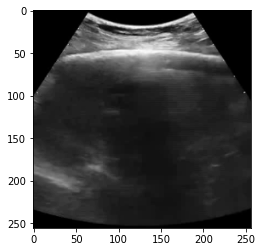

In [23]:
plt.imshow(allImages[0],cmap='gray')

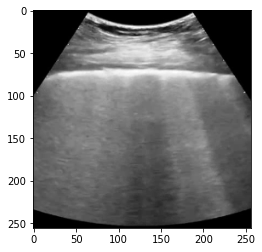

In [24]:
plt.imshow(allImages[20],cmap='gray')

In [25]:
#vasu changed  (-1, 256, 256, 1) to (-1, 224, 224, 1)

allImages = np.array(allImages).reshape(-1, 256, 256, 1)
allImages[20].shape


(256, 256, 1)

In [26]:
allImages.shape

(1118, 256, 256, 1)

In [27]:
allLabels.shape  

(1118,)

In [28]:
np.unique(allLabels) 
np.unique(allLabels, return_counts = True)   #showing the count of each category leaves

(array(['0', '1', '2'], dtype='<U1'), array([337, 365, 416], dtype=int64))

We are confirming that after verification

1.   There are total 1118 gray scale images are of size  (256 * 256)
2.   Lables count is 1118 whose shape is (1118,1)
3.   Labels have 3 unique values existing which acts as 3 classifications(  COVID - 1,NORMAL - 2, PNEUMONIA - 3)

**
The next step is to build the neural network so that it will work with the data that was processed above.**
1. We are creating training, validation, and test sets in the following ratio: 70%/20%/10%
2. We are making sure that the splits maintain the distribution of the classes (stratify may help here)
3. We have used np.unique() to verify that the class distributions are approximately the same in all data sets (return_counts may come in handy here)
4. We will train our network for as many epochs as necessary for the accuracy to stop improving
5. We will compute the accuracy on the test data
6. We will compute the confusion matrix (use tf.math.confusion_matrix())

In [29]:
#SPLITING DATA SET
size_train = 0.7
size_val = 0.2
size_test = 0.1 

size_remaining = 1 - size_test     #0.9
size_val_adjusted = size_val / size_remaining 
print(size_val_adjusted)  #0.222


#Splitting data
train_images,test_images,train_labels,test_labels  = train_test_split(allImages, allLabels, test_size=size_test, random_state=1, stratify = allLabels)

train_images, val_images,train_labels, val_labels  = train_test_split(train_images, train_labels, test_size=size_val_adjusted, random_state=1, stratify=train_labels)
          
print('Train images shape is ',train_images.shape)
print('Train labels shape is ',train_labels.shape)

print('\nTest images shape is ',test_images.shape)
print('Test labels shape is ',test_labels.shape)

print('\nValidation images shape is ',val_images.shape)
print('Validation images shape is ',val_labels.shape) 

0.22222222222222224
Train images shape is  (782, 256, 256, 1)
Train labels shape is  (782,)

Test images shape is  (112, 256, 256, 1)
Test labels shape is  (112,)

Validation images shape is  (224, 256, 256, 1)
Validation images shape is  (224,)


1.   Here, Training images count is 782 which is around 70% of 1118 images
2.   Validation images count is 224 which is around 20% of 1118 images
3.   Test images count is 112 which is around 10% of 1118 images


Stratify is added while spliting the data.
To check if all the datasets have all the classification.

In [30]:
np.unique(train_labels, return_counts = True) 

(array(['0', '1', '2'], dtype='<U1'), array([235, 256, 291], dtype=int64))

In [31]:
np.unique(test_labels, return_counts = True)

(array(['0', '1', '2'], dtype='<U1'), array([34, 36, 42], dtype=int64))

In [32]:
np.unique(val_labels, return_counts = True)

(array(['0', '1', '2'], dtype='<U1'), array([68, 73, 83], dtype=int64))

In [33]:
#Vasu Balancing the train dataset

In [34]:
# print(np.unique(train_labels,return_counts=True))

In [35]:
# from imblearn.over_sampling import SMOTE
# #oversample = SMOTE(sampling_strategy=0.7)

# oversample = SMOTE("minority")

In [36]:
# print(len(train_images),len(train_labels))
# train_images,train_labels = oversample.fit_resample(train_images.reshape(train_images.shape[0],-1), train_labels)
# print(len(train_images),len(train_labels))

In [37]:
# print(np.unique(train_labels,return_counts=True))

(782, 256, 256, 1)
(256, 256, 1)


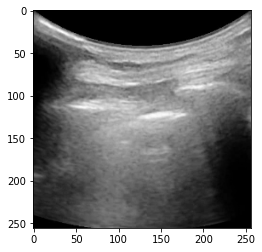

In [38]:
####demo
print(train_images.shape)
print(train_images[1].shape)  #train_images
#print(train_images[1])
plt.imshow(train_images[1], cmap = 'gray')

In [39]:
print(type(train_images[0]))
print(train_images[0].shape)

<class 'numpy.ndarray'>
(256, 256, 1)


In [40]:
##### Fix For error123 ###

print(type(train_labels[0]))

train_labels = np.array([float(numeric_string) for numeric_string in train_labels])


train_labels = train_labels.astype('float32')


print(type(train_labels[0]))

<class 'numpy.str_'>
<class 'numpy.float32'>


In [41]:

# train_images = train_images.astype('float32')
# val_images = val_images.astype('float32')
# test_images = test_images.astype('float32')

#normalizing the array image
train_images = train_images/256.
val_images = val_images/256.
test_images = test_images/256.

In [42]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation = 'relu',input_shape=(256,256,1)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, input_shape = allImages.shape[1:], activation = 'relu'))

#output layer
model.add(Dense(3, activation = 'softmax'))

In [43]:
#compile the model
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

In [44]:
#fit model

history = model.fit(train_images, train_labels, epochs=1,)
hist = history.history

25/25 [==============================] - 67s 3s/step - loss: 0.2942 - accuracy: 0.9003


In [45]:
#save model
model.save(os.path.abspath(os.getcwd()))

#save history
np.save('my_history.npy',hist)

#load model
model = keras.models.load_model(os.path.abspath(os.getcwd()))

#load history
hist=np.load('my_history.npy',allow_pickle='TRUE').item()


INFO:tensorflow:Assets written to: C:\Users\vasuvandan\COVID-US-main\assets


In [46]:
# acc=history.history['accuracy']  ##getting  accuracy of each epochs
# epochs_=range(0,epochs)    
# plt.plot(epochs_,acc,label='training accuracy')
# plt.xlabel('no of epochs')
# plt.ylabel('accuracy')

# acc_val=history.history['val_acc']  ##getting validation accuracy of each epochs
# plt.scatter(epochs_,acc_val,label="validation accuracy")
# plt.title("no of epochs vs accuracy")
# plt.legend()


In [47]:
# from keras.applications.vgg16 import VGG16
# model = VGG16()

In [48]:

# from keras.applications.vgg16 import VGG16
# model = VGG16()
# print(model.summary())

In [49]:
print('Train images data type is',train_images.dtype)
print('First train images shape is',train_images[0].shape)
print('First train image is',train_images[0])
train_images[0].shape

Train images data type is float64
First train images shape is (256, 256, 1)
First train image is [[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]


(256, 256, 1)

In [50]:
print('First Train label is ',train_labels[0])
print('irst test label is ',test_labels[0])
print('First Validation labelis ',val_labels[0])

#Here we are converting the labels to a category
train_labels = to_categorical(train_labels) 
test_labels = to_categorical(test_labels)
val_labels = to_categorical(val_labels)

print('\nFirst Train label after converting to categorical is ',train_labels[0])
print('First test label after converting to categorical is ',test_labels[0])
print('First Validation label after converting to categorical is ',val_labels[0])


First Train label is  1.0
irst test label is  2
First Validation labelis  2

First Train label after converting to categorical is  [0. 1. 0.]
First test label after converting to categorical is  [0. 0. 1.]
First Validation label after converting to categorical is  [0. 0. 1.]


In [51]:
#Creating confusion matrix to check comparison between actual classification and predicted classification
testLabelsPredPart4 = np.argmax((model.predict(test_images)),axis=1)
testLabels = np.argmax((test_labels),axis=1)

print(tf.math.confusion_matrix(testLabels, testLabelsPredPart4))

tf.Tensor(
[[34  0  0]
 [ 0 36  0]
 [ 0  0 42]], shape=(3, 3), dtype=int32)




1. Train your network for as many epochs as necessary for the accuracy to stop improving
2. compute the new accuracy on the test data and compare with that of Part 
3. compute the new confusion matrix (use tf.math.confusion_matrix()) and compare with that of Part 

# DENSENET

In [58]:
callback = keras.callbacks.ModelCheckpoint("DenseNet169", #"DenseNet169.keras"
                                            save_best_only=True,
                                            #save_weights_only=True,
                                            monitor="val_loss")

In [62]:
from tensorflow.keras.optimizers import Adam
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

In [63]:
from keras.applications.densenet import DenseNet169
dense_model = DenseNet169(include_top=True , 
                          weights=None,
                          input_shape = (  256 , 256, 1),
                          classes=3)
dense_model.compile(loss='categorical_crossentropy', optimizer= opt, 
                    metrics=['accuracy'])
#dense_model.summary()
history = dense_model.fit(train_images, train_labels, validation_split=0.2, epochs=5, batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/5
5/5 [==============================] - 3362s 788s/step - loss: 1.2893 - accuracy: 0.6368 - val_loss: 15410871610500659927826038784.0000 - val_accuracy: 0.2930
INFO:tensorflow:Assets written to: DenseNet169\assets
Epoch 2/5
5/5 [==============================] - 1420s 294s/step - loss: 0.1292 - accuracy: 0.9984 - val_loss: 125599704645325859469563789312.0000 - val_accuracy: 0.2930
Epoch 3/5
5/5 [==============================] - 1148s 247s/step - loss: 0.0344 - accuracy: 1.0000 - val_loss: 43169125821527313820418048.0000 - val_accuracy: 0.2930
INFO:tensorflow:Assets written to: DenseNet169\assets
Epoch 4/5
5/5 [==============================] - 1183s 237s/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 21862292045505845264384.0000 - val_accuracy: 0.2930
INFO:tensorflow:Assets written to: DenseNet169\assets
Epoch 5/5
5/5 [==============================] - 1257s 253s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 31479541270761701376.0000 - val_accuracy: 0.2930
INFO:tenso

In [65]:
DenseNet169 = keras.models.load_model('DenseNet169')
loss,acc = DenseNet169.evaluate(val_images, val_labels)
print(f'Accuracy is {100*acc}')

7/7 [==============================] - 56s 8s/step - loss: 31279366382832058368.0000 - accuracy: 0.3036
Accuracy is 30.35714328289032


RITIKA'S CODE

In [ ]:
import gradio
import gradio as gr

In [ ]:
train_images[1].shape

In [ ]:
img=train_images[1]
img = img.reshape((256 * 256))
img = img.reshape(1, 256, 256, 1)
prediction = model.predict(img).tolist()[0]
prediction

# res=disease(img)
# res

In [ ]:
#create a function to make predictions
#return a dictionary of labels and probabilities
def disease(img):
    img = img.reshape((256 * 256))
    img = img.reshape(1, 256, 256, 1)
    prediction = model.predict(img).tolist()[0]
    class_names = ['0', '1', '2']
    return {class_names[i]: prediction[i] for i in range(3)}


#set the user uploaded image as the input array
#match same shape as the input shape in the model
im = gradio.inputs.Image(shape=(256*256), invert_colors=False, source="upload")

#setup the interface
iface = gr.Interface(
    fn = disease, 
    inputs = im, 
    outputs = gradio.outputs.Label(),
)
iface.launch(share=True)

In [ ]:
image = train_images[1]

temp = example(image)

temp

In [ ]:
def example(image):
    image = image.reshape((-1,256, 256)),
    prediction = model.predict(image).flatten(),
    return {class_names[i]: float(prediction[i]) for i in range(3)}

class_names = ['0','1','2'] 

#initializing the input component
image = gr.inputs.Image(shape = (256, 256)) 
# initializing the output component 
label = gr.outputs.Label(num_top_classes = 3)

# launching the interface
gr.Interface(fn = example,inputs = image,outputs = label,capture_session = True,
             title="This is an example",description= "Description of the user interface").launch(share=True)